<a href="https://colab.research.google.com/github/serpentile-c137/AIDL/blob/master/AIDL_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train) ,(X_test,y_test) = tf.keras.datasets.mnist.load_data()

X_train =  X_train.reshape(-1,784).astype('float32') /255
X_test = X_test.reshape(-1,784).astype('float32') /255

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 784)

In [7]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_tf.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [14]:
history_tf = model_tf.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9753 - val_loss: 0.1001
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9977 - loss: 0.0085 - val_accuracy: 0.9763 - val_loss: 0.0860
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9983 - loss: 0.0075 - val_accuracy: 0.9747 - val_loss: 0.1018
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9978 - loss: 0.0082 - val_accuracy: 0.9752 - val_loss: 0.0999
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9722 - val_loss: 0.1160
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9758 - val_loss: 0.1129
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9735 - val_loss: 0.1291
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9973 - loss: 0.0083 - 

In [15]:
loss, accuracy = model_tf.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.1746
Test Loss: 0.1402, Test Accuracy: 97.66%


In [16]:
predictions_tf = model_tf.predict(X_test[:5])
predict_labels_tf = np.argmax(predictions_tf, axis=1)
actual_labels_tf = np.argmax(y_test[:5], axis=1)
print(f'Predicted Labels: {predict_labels_tf}')
print(f'Actual Labels: {actual_labels_tf}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Labels: [7 2 1 0 4]
Actual Labels: [7 2 1 0 4]


In [17]:
for i in range(5):
  print(f'Predicted Label: {predict_labels_tf[i]}, Actual Label: {actual_labels_tf[i]}')

Predicted Label: 7, Actual Label: 7
Predicted Label: 2, Actual Label: 2
Predicted Label: 1, Actual Label: 1
Predicted Label: 0, Actual Label: 0
Predicted Label: 4, Actual Label: 4


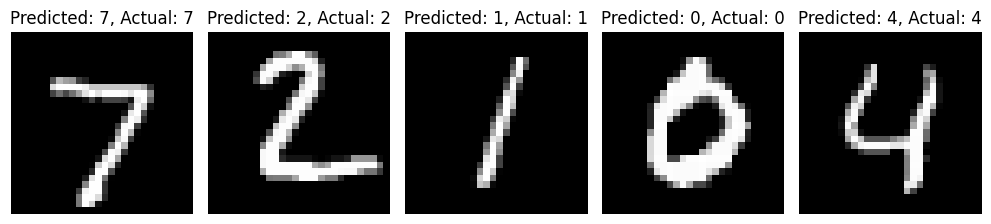

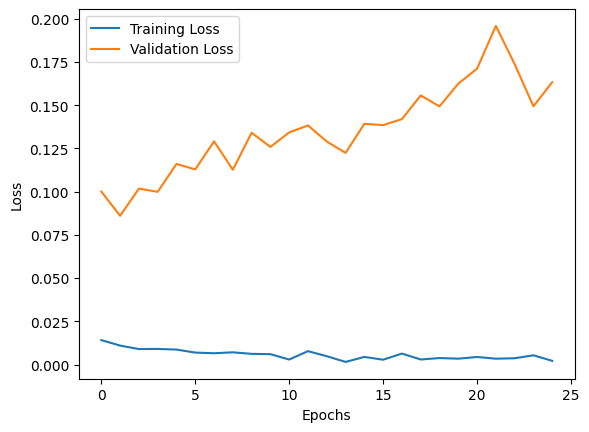

In [18]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predict_labels_tf[i]}, Actual: {actual_labels_tf[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.plot(history_tf.history['loss'], label='Training Loss')
plt.plot(history_tf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()